In [2]:
import pandas as pd
import numpy as np
import math
df=pd.read_csv("/Users/mac/code/Sebban77/07-ML-Ops/01-Train-at-scale/data-train-at-scale/prelectureMLops/project/data/query_2009-01-01_2015-01-01_200k.csv")
df

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.20,2009-01-01 01:14:44+00:00,-73.982410,40.782397,-73.978177,40.783295,1
1,11.80,2009-01-01 03:51:05+00:00,-74.006797,40.716359,-73.978616,40.752433,2
2,26.60,2009-01-01 04:23:00+00:00,-73.982930,40.742167,-73.896904,40.843012,1
3,19.80,2009-01-01 04:49:52+00:00,-73.983822,40.729471,-73.982300,40.776622,2
4,3.40,2009-01-01 05:04:41+00:00,-74.013008,40.706021,-74.012851,40.702645,1
...,...,...,...,...,...,...,...
90738,14.50,2014-12-31 22:08:00+00:00,-73.980395,40.742585,-73.994602,40.769627,1
90739,9.50,2014-12-31 22:19:11+00:00,-73.962421,40.794752,-73.940646,40.814270,2
90740,74.16,2014-12-31 22:26:27+00:00,-73.783610,40.648637,-74.091878,40.626073,2
90741,8.50,2014-12-31 22:29:09+00:00,-73.995097,40.752067,-73.981982,40.766362,1


(array([  320., 62729.,     0., 13420.,     0.,  4068.,  1950.,     0.,
         6375.,  1881.]),
 array([0. , 0.6, 1.2, 1.8, 2.4, 3. , 3.6, 4.2, 4.8, 5.4, 6. ]),
 <BarContainer object of 10 artists>)

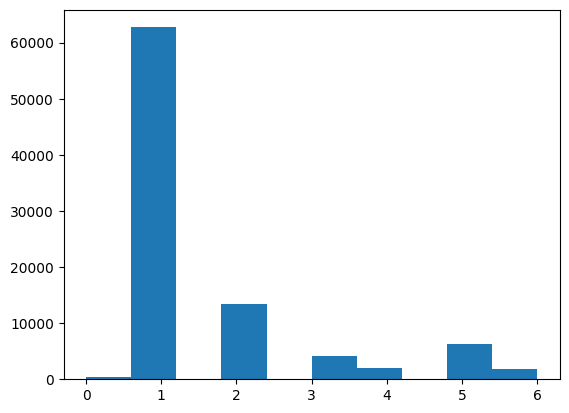

In [6]:
import matplotlib.pyplot as plt

plt.hist(df.passenger_count)

In [7]:
from sklearn.preprocessing import MinMaxScaler

In [8]:
def passenger_scale(df):
    scaler = MinMaxScaler()
    df['passenger_count_scaled'] = scaler.fit_transform(df[['passenger_count']])
    return df

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,passenger_count_scaled
0,4.20,2009-01-01 01:14:44+00:00,-73.982410,40.782397,-73.978177,40.783295,1,0.166667
1,11.80,2009-01-01 03:51:05+00:00,-74.006797,40.716359,-73.978616,40.752433,2,0.333333
2,26.60,2009-01-01 04:23:00+00:00,-73.982930,40.742167,-73.896904,40.843012,1,0.166667
3,19.80,2009-01-01 04:49:52+00:00,-73.983822,40.729471,-73.982300,40.776622,2,0.333333
4,3.40,2009-01-01 05:04:41+00:00,-74.013008,40.706021,-74.012851,40.702645,1,0.166667
...,...,...,...,...,...,...,...,...
90738,14.50,2014-12-31 22:08:00+00:00,-73.980395,40.742585,-73.994602,40.769627,1,0.166667
90739,9.50,2014-12-31 22:19:11+00:00,-73.962421,40.794752,-73.940646,40.814270,2,0.333333
90740,74.16,2014-12-31 22:26:27+00:00,-73.783610,40.648637,-74.091878,40.626073,2,0.333333
90741,8.50,2014-12-31 22:29:09+00:00,-73.995097,40.752067,-73.981982,40.766362,1,0.166667
